In [1]:
# print('### OS ###')
# !cat /etc/issue.net

# print('### CPU ###')
# !cat /proc/cpuinfo

# print('### MEM ###')
# !cat /proc/meminfo

# print('### DISK ###')
# !df -h

# print('### GPU ###')
# !nvidia-smi

In [2]:
import tensorflow as tf
print(tf.__version__)

import torch
import torchvision
import torchtext
print(torch.__version__)

2.4.1
1.7.1+cu101


In [3]:
import gym
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

tf.compat.v1.disable_eager_execution()

def one_hot(x):
  return np.identity(16)[x:x + 1] # 숏코딩하냐?

env = gym.make('FrozenLake-v0')

input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

X = tf.placeholder(shape=[1, input_size], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))

Qpred = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)

loss = tf.reduce_sum(tf.square(Y - Qpred))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

dis = .99
num_episodes = 2000

rList = []

percent of successful episodes: 46.1%


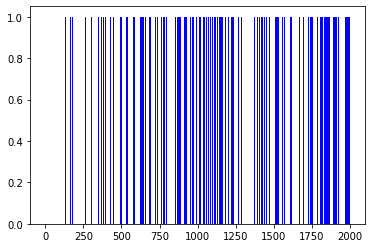

In [ ]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for i in range(num_episodes):
    s = env.reset()
    e = 1. / ((i/50) + 10)
    rAll = 0
    done = False
    local_loss = []

    while not done:
      Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
      if np.random.rand(1) < e:
        a = env.action_space.sample()
      else:
        a = np.argmax(Qs)
      
      s1, reward, done, _ = env.step(a)
      if done:
        Qs[0, a] = reward
      else:
        Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
        Qs[0, a] = reward + dis * np.max(Qs1)

      sess.run(train, feed_dict={X: one_hot(s), Y: Qs})

      rAll += reward
      s = s1
    rList.append(rAll)
  
print("percent of successful episodes: " + str(sum(rList)/num_episodes*100) + '%')
plt.bar(range(len(rList)), rList, color='blue')
plt.show()